In [1]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
#from pip._internal.operations.freeze import freeze
#for requirement in freeze(local_only=True):
#    print(requirement)

The scikit-learn version is 0.23.1.


In [2]:
import os
import sys
import numpy as np
import pandas as pd
from statistics import mean 

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import com_func

Dataset = "pubmed"
result_path = "../../result/"+Dataset+"/1_Clustering_sample=140k/"
filter_size = 100
fig_save_path = "../../plot/1_clustering/filter="+str(filter_size)+"/"

# Step 1 Load all saved result

In [4]:
# --------------- load result --------------- #
pp_text_emb = ["tf", "tf_idf", "lsa", "pv_dm", "pv_dbow"]
pp_citation_emb = ["off","n2v"]
author_group = []
k_mean_result = []
AHC_single_result = []
AHC_complete_result = []
AHC_average_result = []
AHC_ward_result = []
prevent_repeat_load = []
for text_emb in pp_text_emb:
    for citation_emb in pp_citation_emb:
        if text_emb is "off" and citation_emb is "off":
            break
        if text_emb is "tf" or text_emb is "tf_idf":
            citation_emb="off"
        result_filename = "citation="+citation_emb+"_textual="+text_emb+"_threshold="+str(filter_size)+".csv"
        if result_filename in prevent_repeat_load:
            break
        print(text_emb+" "+citation_emb)
        final_path = os.path.normpath(os.path.join(result_path,result_filename))
        result = pd.read_csv(final_path)
        prevent_repeat_load.append(result_filename)
        # save result in array
        author_group.append(result["Name Group"].values)
        k_mean_result.append(result["kmean_Pf1"].values)
        AHC_single_result.append(result["AHC_single_Pf1"].values)
        AHC_complete_result.append(result["AHC_complete_Pf1"].values)
        AHC_average_result.append(result["AHC_average_Pf1"].values)
        AHC_ward_result.append(result["AHC_ward_Pf1"].values)
        
author_group = list(set(map(tuple, author_group)))
author_group = [name for tup in author_group for name in tup]

tf off
tf_idf off
lsa off
lsa n2v
pv_dm off
pv_dm n2v
pv_dbow off
pv_dbow n2v


In [5]:
# --------- axs fix for subplot ---------- #
def trim_axs(axs, N):
    """little helper to massage the axs list to have correct length..."""
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

# Step 2: Plot 1: all groups w.r.t different embedding method

In [6]:
clustering_methods = ["K_mean","AHC single","AHC complete", "AHC average", "AHC ward"]
embedding_methods = ["TF","TF-IDF","LSA", "LSA&n2v","PV-DM","PV-DM&n2v","PV-DBOW","PV-DBOW&n2v"]

In [9]:
# ------------- sort result -------------------#
# print(embedding_methods)
# for row_idx,method in enumerate(embedding_methods):
#     print(np.mean(k_mean_result[row_idx]))

# #-------------- reformate result -------------- #
# k_mean_result_authorwise = []
# for col_idx,author in enumerate(author_group):
#     author_result = []
#     for row_idx,method in enumerate(embedding_methods):
#         author_result.append(k_mean_result[row_idx][col_idx])
#     k_mean_result_authorwise.append(author_result)
# print(k_mean_result_authorwise)

#-------------- reformate result -------------- #
all_result_clusterwise = []
all_result_clusterwise.append(k_mean_result)
all_result_clusterwise.append(AHC_single_result)
all_result_clusterwise.append(AHC_complete_result)
all_result_clusterwise.append(AHC_average_result)
all_result_clusterwise.append(AHC_ward_result)

# all_result_reformated = []
# for result in all_result_clusterwise:
#     result_reformated = []
#     #print(result)
#     for col_idx,author in enumerate(result):
#         author_result = []
#         for row_idx,method in enumerate(embedding_methods):
#             author_result.append(result[row_idx][col_idx])
#         result_reformated.append(author_result)
#     #print(result_reformated)
#     all_result_reformated.append(result_reformated)

['TF', 'TF-IDF', 'LSA', 'LSA&n2v', 'PV-DM', 'PV-DM&n2v', 'PV-DBOW', 'PV-DBOW&n2v']
0.8959323671791442
0.8620069259962455
0.8892121066084735
0.8115167776494724
0.856413696239931
0.9133915301129257
0.9456959535981828
0.9357194803551404
check


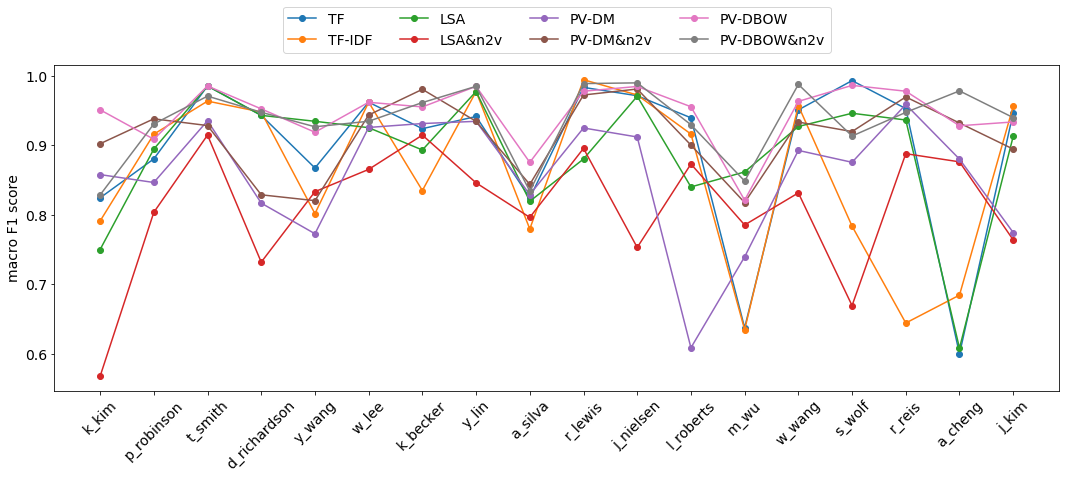

['TF', 'TF-IDF', 'LSA', 'LSA&n2v', 'PV-DM', 'PV-DM&n2v', 'PV-DBOW', 'PV-DBOW&n2v']
0.6658644820476805
0.6655111684816511
0.6659482808529952
0.6658230571982712
0.6655453478466251
0.6656018875703043
0.666009466562724
0.6662522991431659
check


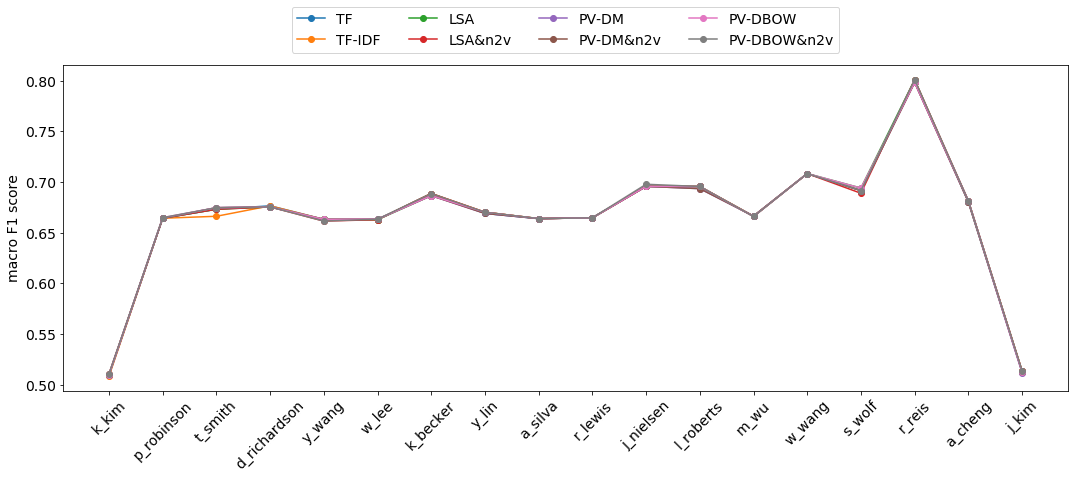

['TF', 'TF-IDF', 'LSA', 'LSA&n2v', 'PV-DM', 'PV-DM&n2v', 'PV-DBOW', 'PV-DBOW&n2v']
0.7067034030759838
0.6176653049627937
0.7003656544305497
0.6976684504350207
0.7434053640254581
0.7315873392526601
0.8709487847640566
0.7834579768211479
check


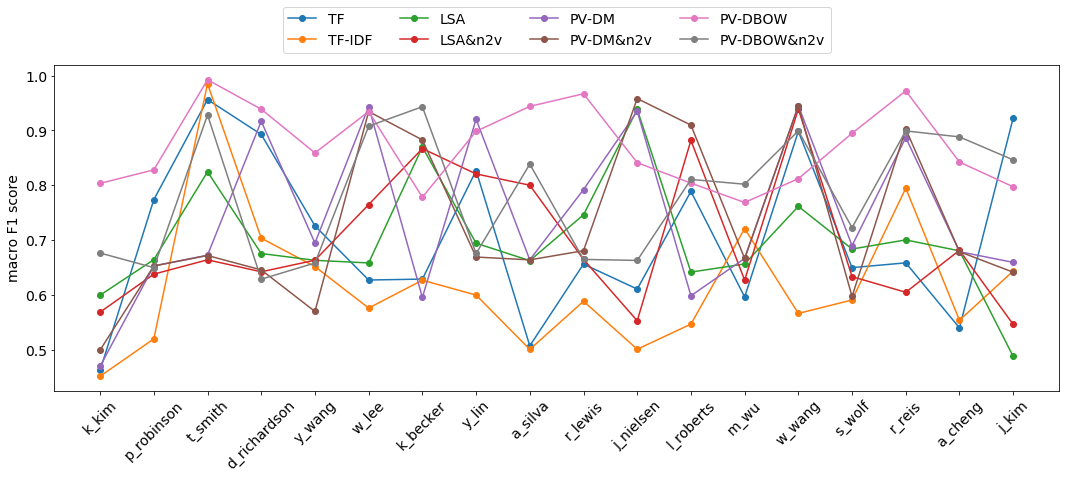

['TF', 'TF-IDF', 'LSA', 'LSA&n2v', 'PV-DM', 'PV-DM&n2v', 'PV-DBOW', 'PV-DBOW&n2v']
0.7107853931069704
0.7113135947010858
0.6658485722747179
0.6649782855703636
0.6651029623345444
0.6660193740755318
0.7514437781206054
0.7365808342962217
check


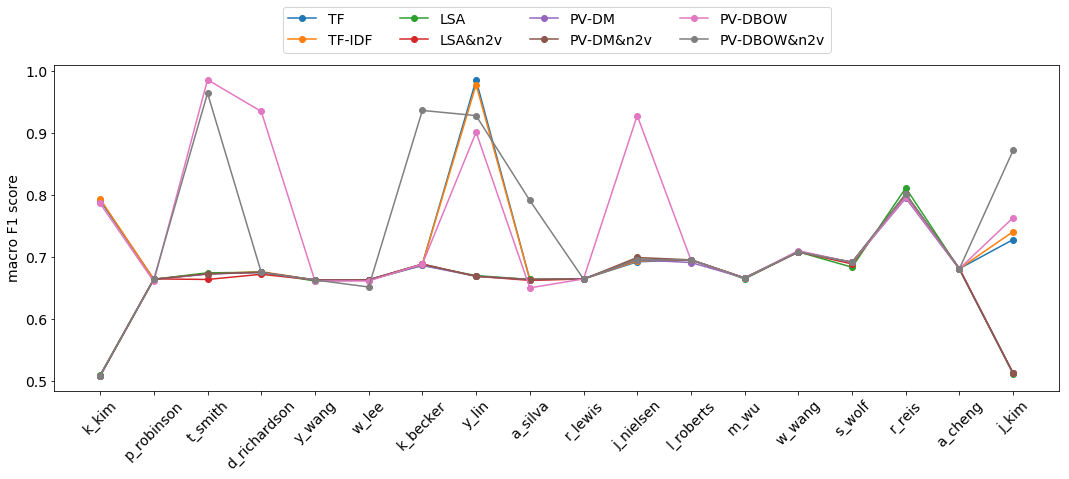

['TF', 'TF-IDF', 'LSA', 'LSA&n2v', 'PV-DM', 'PV-DM&n2v', 'PV-DBOW', 'PV-DBOW&n2v']
0.8768833972492014
0.8214868241781993
0.8506634160716318
0.8058791250247289
0.8561997771200791
0.9038492081498115
0.9205799132113318
0.9177078978369505
check


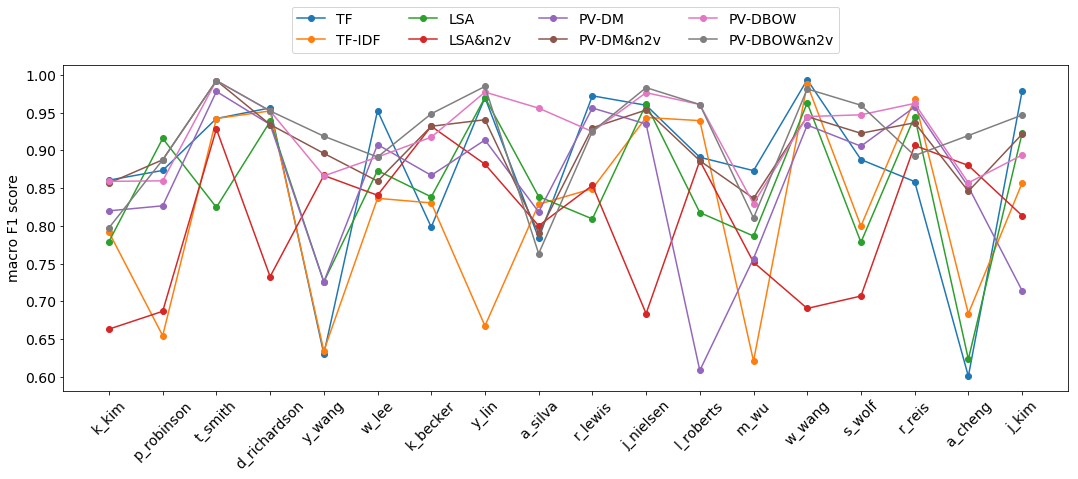

In [16]:
import math
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})

figsize = (18, 6)
col = 1
row = math.ceil(len(clustering_methods)/col)

for idx, (result,method) in enumerate(zip(all_result_clusterwise,clustering_methods)):
    fig, axs = plt.subplots(figsize=figsize)
    plt.setp(axs, xticks=range(len(author_group)), xticklabels=author_group)
    plt.setp(axs.get_xticklabels(), rotation=45, horizontalalignment='center')
    print(embedding_methods)
    for emb,emb_label in zip(result, embedding_methods):
        print(np.mean(emb))
        axs.plot(emb, marker='o',label=emb_label)
    legend=axs.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=4)
    plt.ylabel('macro F1 score')
    try:
        print("check")
        #plt.savefig(filename=fig_save_path+"filter="+str(filter_size)+"_"+method+".png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
    except:
        if not os.path.exists(fig_save_path):
            os.makedirs(fig_save_path)
        #plt.savefig(filename=fig_save_path+"filter="+str(filter_size)+"_"+method+".png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
    plt.show()

# Step 2: Plot 2: average w.r.t different embedding method

In [17]:
import collections

average_result = collections.defaultdict(list)
for result, method in zip(all_result_clusterwise,clustering_methods):
    average_result[method] = [np.mean(sublist) for sublist in result]
print(average_result)

defaultdict(<class 'list'>, {'K_mean': [0.8959323671791442, 0.8620069259962455, 0.8892121066084735, 0.8115167776494724, 0.856413696239931, 0.9133915301129257, 0.9456959535981828, 0.9357194803551404], 'AHC single': [0.6658644820476805, 0.6655111684816511, 0.6659482808529952, 0.6658230571982712, 0.6655453478466251, 0.6656018875703043, 0.666009466562724, 0.6662522991431659], 'AHC complete': [0.7067034030759838, 0.6176653049627937, 0.7003656544305497, 0.6976684504350207, 0.7434053640254581, 0.7315873392526601, 0.8709487847640566, 0.7834579768211479], 'AHC average': [0.7107853931069704, 0.7113135947010858, 0.6658485722747179, 0.6649782855703636, 0.6651029623345444, 0.6660193740755318, 0.7514437781206054, 0.7365808342962217], 'AHC ward': [0.8768833972492014, 0.8214868241781993, 0.8506634160716318, 0.8058791250247289, 0.8561997771200791, 0.9038492081498115, 0.9205799132113318, 0.9177078978369505]})


K_mean
[0.8959323671791442, 0.8620069259962455, 0.8892121066084735, 0.8115167776494724, 0.856413696239931, 0.9133915301129257, 0.9456959535981828, 0.9357194803551404]
AHC single
[0.6658644820476805, 0.6655111684816511, 0.6659482808529952, 0.6658230571982712, 0.6655453478466251, 0.6656018875703043, 0.666009466562724, 0.6662522991431659]
AHC complete
[0.7067034030759838, 0.6176653049627937, 0.7003656544305497, 0.6976684504350207, 0.7434053640254581, 0.7315873392526601, 0.8709487847640566, 0.7834579768211479]
AHC average
[0.7107853931069704, 0.7113135947010858, 0.6658485722747179, 0.6649782855703636, 0.6651029623345444, 0.6660193740755318, 0.7514437781206054, 0.7365808342962217]
AHC ward
[0.8768833972492014, 0.8214868241781993, 0.8506634160716318, 0.8058791250247289, 0.8561997771200791, 0.9038492081498115, 0.9205799132113318, 0.9177078978369505]
test


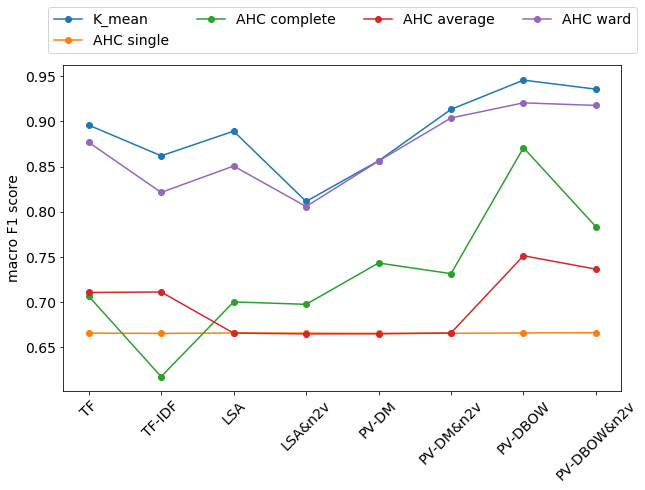

In [28]:
figsize = (10, 6)
fig, axs = plt.subplots(figsize=figsize)
plt.setp(axs, xticks=range(len(embedding_methods)), xticklabels=embedding_methods)
plt.setp(axs.get_xticklabels(), rotation=45, horizontalalignment='center')
for method, result in average_result.items():
    print(method)
    print(result)
    axs.plot(result, marker='o',label=method)
legend=axs.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=4)
plt.ylabel('macro F1 score')
try:
    plt.savefig(fname=fig_save_path+"filter="+str(filter_size)+"_all_method_average_f1.png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
except:
    if not os.path.exists(fig_save_path):
        os.makedirs(fig_save_path)
    plt.savefig(fname=fig_save_path+"filter="+str(filter_size)+"_all_method_average_f1.png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
plt.show()

# Step 3: Plot w.r.t different clustering method

In [ ]:
all_result_clusterwise

In [ ]:
#--------- reformate ------------- #
all_result_embeddingwise=list(zip(*all_result_clusterwise))
print(all_result_embeddingwise)

In [ ]:
import math
import matplotlib.pyplot as plt

figsize = (18, 6)
col = 1
row = math.ceil(len(clustering_methods)/col)
for idx, (result,method) in enumerate(zip(all_result_embeddingwise,embedding_methods)):
    fig, axs = plt.subplots(figsize=figsize)
    plt.setp(axs, xticks=range(len(author_group)), xticklabels=author_group)
    plt.setp(axs.get_xticklabels(), rotation=45, horizontalalignment='center')
    print(method)
    for clustering_result,clustering_label in zip(result, clustering_methods):
        print(clustering_label)
        print(np.mean(clustering_result))
        axs.plot(clustering_result, marker='o',label=clustering_label)
    legend=axs.legend(loc='upper center', bbox_to_anchor=(0.5, 1.2),ncol=4)
    plt.ylabel('macro F1 score')
    try:
        plt.savefig(filename=fig_save_path+"filter="+str(filter_size)+"_"+method+".png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
    except:
        if not os.path.exists(fig_save_path):
            os.makedirs(fig_save_path)
        plt.savefig(filename=fig_save_path+"filter="+str(filter_size)+"_"+method+".png",dpi=200,bbox_extra_artists=(legend,), bbox_inches='tight')
    plt.show()